In [993]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [994]:
def find_z_score(probability):
    """
    Function to find the z-score corresponding to a given probability in a standard normal distribution.
    
    Parameters:
        probability (float): The probability for which you want to find the z-score.
        
    Returns:
        z_score (float): The z-score corresponding to the given probability.
    """
    z_score = st.norm.ppf((1 + probability) / 2) # adjusting for two-tailed distribution
    
    return z_score

In [995]:
#Ex avg. number of posts likes increase
a = [
    7.25,
    7.739,
    7.658,
    7.706,
    7.393,
    7.922,
    7.587,
    7.257,
    7.223,
    7.177,
    7.049,
    47.25,
    8.739,
    4.658,
    8.706,
    7.393,
    4.922,
    4.587,
    4.257,
    4.223,
    4.177,
    4.049,
    4.25,
    5.739,
    4.658,
    9.706,
    9.393,
    9.922,
    9.587,
    9.257,
    9.223,
    9.177,
    9.049,
    9.25,
    9.739,
    9.658,
    9.706,
    9.393,
    9.922,
    9.587,
    9.257,
    9.223,
    9.177,
    9.049,
    9.25,
    5.739,
    4.658,
    3.706,
    4.393,
    4.922,
    4.587,
    4.257,
    4.223,
    4.177,
    4.049,
    4.25,
    5.739,
    4.658,
    3.706,
    4.393,
    4.922,
    4.587,
    4.257,
    4.223,
    4.177,
    4.049
]
b = [
    1.524,
    2.712,
    2.912,
    2.853,
    3.127,
    3.868,
    3.118,
    2.908,
    2.622,
    2.255,
    1.957,
    1.524,
    2.712,
    2.912,
    2.853,
    3.127,
    3.868,
    3.118,
    2.908,
    2.622,
    2.255,
    1.957,
    1.524,
    2.712,
    2.912,
    2.853,
    3.127,
    3.868,
    3.118,
    2.908,
    2.622,
    2.255,
    6.957,
    6.524,
    2.712,
    2.912,
    2.853,
    3.127,
    3.868,
    3.118,
    2.908,
    2.622,
    2.255,
    6.957,
    6.524,
    2.712,
    2.912,
    2.853,
    3.127,
    3.868,
    3.118,
    2.908,
    2.622,
    6.255,
    6.957,
    6.524,
    6.712,
    6.912,
    6.853,
    6.127,
    6.868,
    6.118,
    7.908,
    7.622,
    7.255,
    7.957
]


In [996]:
def t_test_ind_samples(d_hat, pooled_std_err):
    return d_hat / pooled_std_err

def pooled_std_dev(sse1, sse2, dof):
    x = np.sqrt((sse1 + sse2) / dof) 
    return x

def pooled_std_err(pooled_std_dev, n1, n2):
    y = pooled_std_dev * np.sqrt( (1/n1 )+ (1/n2) )
    return y

def sse(mean, series):
    sse = np.sum([(x - mean)**2 for x in series])
    return sse

def dof(n1, n2):
    dof = n1 + n2 - 2
    return dof

def get_t_crit(dof, alpha):
    t_crit = st.t.ppf(1 - alpha/2, dof)
    return t_crit

def unpooled_std_err():
    pass

In [997]:
#Calculate mean and sample size for variants
mean1 = np.mean(a)
mean2 = np.mean(b)

alpha = 0.05
effect_size = .02
d_min = mean2 * (1+effect_size)

print(mean2, d_min)

#Difference in means
d_hat = mean1 - mean2

#Get Sample Sizes
n1 = len(a)
n2 = len(b)

#Calculate Sum of Squared errors for each variat
sse1 = sse(mean1, a)
sse2 = sse(mean2, b)

#Calculate degrees of freedom
dof = dof(n1,n2)

#Calculate the pooled standar error of the samples
pooled_std_dev = pooled_std_dev(sse1, sse2, dof)

#Calculate pooled std_err 
pooled_std_err = pooled_std_err(pooled_std_dev, n1, n2)

unpooled_std_error = 0

#Compute the test statistic
t = t_test_ind_samples(d_hat, pooled_std_err)

#Compute the critical value
t_crit = get_t_crit(dof, alpha)

#Calculate CI 
m = t_crit * pooled_std_err
lb = d_hat - m
ub = d_hat + m

3.8656969696969696 3.943010909090909


In [998]:
def stretch_numbers(num1, num2, n):
    """
    Stretch two numbers into a list of n elements by linear interpolation.
    """
    if n <= 2:
        raise ValueError("n should be greater than 2 for stretching")

    step = (num2 - num1) / (n - 1)  # Calculate the step size for linear interpolation
    stretched_list = [num1 + i * step for i in range(n)]  # Linearly interpolate between num1 and num2
    return stretched_list

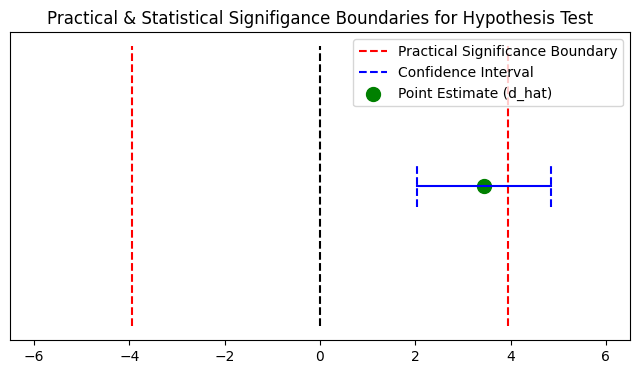

In [999]:
x = stretch_numbers(-d_min*1.50, d_min*1.50, 5)
y = [1,1,1,1,1]

x_dmin = list([d_min])*5
y1 = [0,1,2,3,4]

x_neg_dmin = list([-d_min])*5
y1 = [0,1,2,3,4]

plt.figure(figsize=(8,4))

plt.plot(x, y, color = 'white')
plt.plot(stretch_numbers(0,0,5), stretch_numbers(0,4,5), color = 'black', linestyle='--')
plt.plot(x_dmin, y1, color ='red',  linestyle='--')
plt.plot(x_neg_dmin, y1, color ='red',  linestyle='--', label = 'Practical Significance Boundary')

#Plot CI
plt.plot(stretch_numbers(lb,ub,5), stretch_numbers(2,2,5), color ='blue',  linestyle='-')
plt.plot(stretch_numbers(lb,lb,5), stretch_numbers(2*.85,2*1.15,5), color ='blue',  linestyle='--')
plt.plot(stretch_numbers(ub,ub,5), stretch_numbers(2*.85,2*1.15,5), color ='blue',  linestyle='--', label ='Confidence Interval')

#Adding Point Estimate for 
plt.scatter(d_hat, 2, color='green', s=100, label='Point Estimate (d_hat)')

# Hide y-axis ticks
plt.yticks([]) 

plt.title("Practical & Statistical Signifigance Boundaries for Hypothesis Test")
# Adding legend
plt.legend(loc='upper right')

plt.show()

In [1000]:
n= 20
p = .05
q= 1-p

var = n * p * q

In [1006]:
data = [87029, 113407, 84843, 104994, 99327, 92052, 60684]

n = len(data)
mean = np.mean(data)

se = np.std(data, ddof=1) / np.sqrt(n)

m = find_z_score(.95) * se

mean - m , mean+ m

(79157.77494303953, 104366.79648553189)